C:\Users\u1246538\AppData\Local\Temp\ipykernel_17048\2573878030.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_mhi5.loc[:, reverse_columns] = df_2022_mhi5[reverse_columns].apply(pd.to_numeric, errors='coerce')
C:\Users\u1246538\AppData\Local\Temp\ipykernel_17048\2573878030.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_mhi5.loc[:, reverse_columns] = 7 - df_2022_mhi5[reverse_columns]
C:\Users\u1246538\AppData\Local\Temp\ipykernel_17048\2573878030.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

Counts of Mental Health Classes:
mental_health_class
Good Mental Health    785
Poor Mental Health    209
Name: count, dtype: int64

Proportions of Mental Health Classes (%):
mental_health_class
Good Mental Health    78.973843
Poor Mental Health    21.026157
Name: count, dtype: float64

Counts of Class:
class
Good Mental Health (0)    785
Poor Mental Health (1)    209
Name: count, dtype: int64
   standardized_score mental_health_class  class
0                84.0  Good Mental Health    0.0
1                52.0  Poor Mental Health    1.0
2                64.0  Good Mental Health    0.0
3                76.0  Good Mental Health    0.0
4                88.0  Good Mental Health    0.0


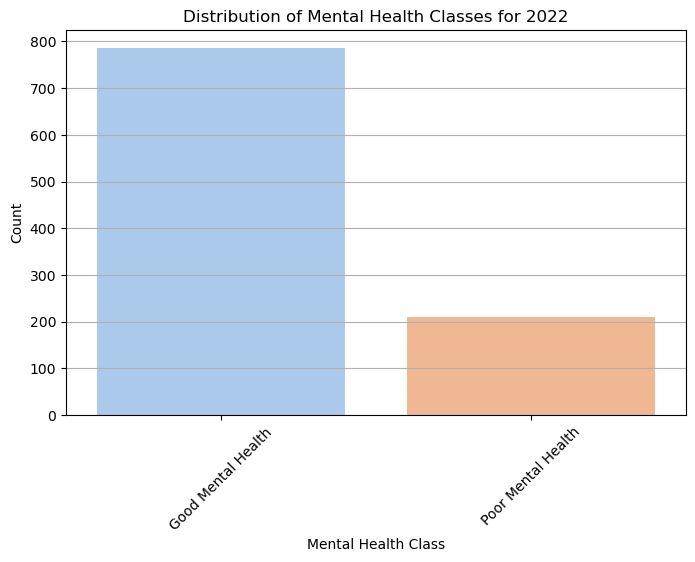

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned 2022 dataset
file_path = 'C:/Users/u1246538/Downloads/liss-data/merged_health_data_2022_cleaned.csv'
df_2022 = pd.read_csv(file_path)

# Select the MHI-5 columns
mhi5_columns = ['ch22o011', 'ch22o012', 'ch22o013', 'ch22o014', 'ch22o015']
df_2022_mhi5 = df_2022[mhi5_columns]

# Reverse scoring for negative questions (ch22o011, ch22o012, ch22o014)
reverse_columns = ['ch22o011', 'ch22o012', 'ch22o014']
df_2022_mhi5.loc[:, reverse_columns] = df_2022_mhi5[reverse_columns].apply(pd.to_numeric, errors='coerce')

# Reverse scoring for negative questions (now safe to subtract 7 from numeric values)
df_2022_mhi5.loc[:, reverse_columns] = 7 - df_2022_mhi5[reverse_columns]

# Ensure all columns are numeric and handle any errors
df_2022_mhi5[mhi5_columns] = df_2022_mhi5[mhi5_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if necessary)
df_2022_mhi5 = df_2022_mhi5.dropna()

# Sum the scores for each individual (raw score ranges between 5 and 30)
df_2022_mhi5['raw_score'] = df_2022_mhi5[mhi5_columns].sum(axis=1)

# Standardize the score to a 0-100 scale
df_2022_mhi5['standardized_score'] = ((df_2022_mhi5['raw_score'] - 5) / 25) * 100

# Create a binary classification for mental health status
df_2022_mhi5['mental_health_class'] = df_2022_mhi5['standardized_score'].apply(
    lambda x: 'Good Mental Health' if x > 60 else 'Poor Mental Health'
)

# Create numeric classes for modeling (0 for good, 1 for poor) and rename the column to 'class'
df_2022_mhi5['class'] = df_2022_mhi5['mental_health_class'].apply(
    lambda x: 0 if x == 'Good Mental Health' else 1
)



# Output the counts and proportions
print("Counts of Mental Health Classes:")
print(class_counts)
print("\nProportions of Mental Health Classes (%):")
print(class_proportions)

# Show counts for the new class column
class_count_values = df_mhi5['class'].value_counts().rename({0: 'Good Mental Health (0)', 1: 'Poor Mental Health (1)'})
print("\nCounts of Class:")
print(class_count_values)


# Merge the new columns back into the original dataframe
df_2022[['standardized_score', 'mental_health_class', 'class']] = df_2022_mhi5[['standardized_score', 'mental_health_class', 'class']]

# Save the modified DataFrame to the original file path (or a new one)
output_file_path = 'C:/Users/u1246538/Downloads/liss-data/merged_health_data_2022_cleaned_with_mhi5.csv'
df_2022.to_csv(output_file_path, index=False)

# Check the first few rows to verify the new columns
print(df_2022[['standardized_score', 'mental_health_class', 'class']].head())

# Visualization: Bar plot of the counts of the 'mental_health_class' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df_2022, x='mental_health_class', palette='pastel')
plt.title('Distribution of Mental Health Classes for 2022')
plt.xlabel('Mental Health Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Save the figure
plt.savefig('mental_health_distribution_2022.png', dpi=300, bbox_inches='tight')  # Save as PNG file

# Show the plot
plt.show()


In [51]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/u1246538/Downloads/liss-data/merged_health_data_2022_cleaned_with_mhi5.csv'
df_2022 = pd.read_csv(file_path)

# Print all columns of the dataset
print("Columns in the dataset:")
print(df_2022.columns.tolist())

# To display all rows, you can use:
print("\nFirst 5 rows of the dataset:")
print(df_2022.head())


Columns in the dataset:
['ch22o011', 'ch22o012', 'ch22o013', 'ch22o014', 'ch22o015', 'ch22o162', 'nomem_encr', 'cp22n020', 'cp22n021', 'cp22n022', 'cp22n023', 'cp22n024', 'cp22n025', 'cp22n026', 'cp22n027', 'cp22n028', 'cp22n029', 'cp22n030', 'cp22n031', 'cp22n032', 'cp22n033', 'cp22n034', 'cp22n035', 'cp22n036', 'cp22n037', 'cp22n038', 'cp22n039', 'cp22n040', 'cp22n041', 'cp22n042', 'cp22n043', 'cp22n044', 'cp22n045', 'cp22n046', 'cp22n047', 'cp22n048', 'cp22n049', 'cp22n050', 'cp22n051', 'cp22n052', 'cp22n053', 'cp22n054', 'cp22n055', 'cp22n056', 'cp22n057', 'cp22n058', 'cp22n059', 'cp22n060', 'cp22n061', 'cp22n062', 'cp22n063', 'cp22n064', 'cp22n065', 'cp22n066', 'cp22n067', 'cp22n068', 'cp22n069', 'cp22n070', 'cp22n071', 'cp22n072', 'cp22n073', 'cp22n074', 'cp22n075', 'cp22n076', 'cp22n077', 'cp22n078', 'cp22n079', 'cp22n099', 'cp22n100', 'cp22n101', 'cp22n102', 'cp22n103', 'cp22n104', 'cp22n105', 'cp22n106', 'cp22n107', 'cp22n108', 'cp22n109', 'cp22n110', 'cp22n111', 'cp22n112', '


Missing values in MHI-5 columns:
ch23p011    0
ch23p012    0
ch23p013    0
ch23p014    0
ch23p015    0
dtype: int64

Data types after conversion:
ch23p011    float64
ch23p012    float64
ch23p013    float64
ch23p014    float64
ch23p015    float64
dtype: object

Counts of Mental Health Classes for 2023:
mental_health_class
Good Mental Health    719
Poor Mental Health    176
Name: count, dtype: int64

Proportions of Mental Health Classes for 2023 (%):
mental_health_class
Good Mental Health    80.335196
Poor Mental Health    19.664804
Name: count, dtype: float64

Counts of Class for 2023:
class
Good Mental Health (0)    719
Poor Mental Health (1)    176
Name: count, dtype: int64
   standardized_score mental_health_class  class
0                84.0  Good Mental Health    0.0
1                52.0  Poor Mental Health    1.0
2                64.0  Good Mental Health    0.0
3                76.0  Good Mental Health    0.0
4                88.0  Good Mental Health    0.0


C:\Users\u1246538\AppData\Local\Temp\ipykernel_17048\2377833374.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mhi5_2023[mhi5_columns_2023] = df_mhi5_2023[mhi5_columns_2023].apply(pd.to_numeric, errors='coerce')
C:\Users\u1246538\AppData\Local\Temp\ipykernel_17048\2377833374.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mhi5_2023[reverse_columns_2023] = 7 - df_mhi5_2023[reverse_columns_2023]
C:\Users\u1246538\AppData\Local\Temp\ipykernel_17048\2377833374.py:29: SettingWithCopyWarning: 
A 

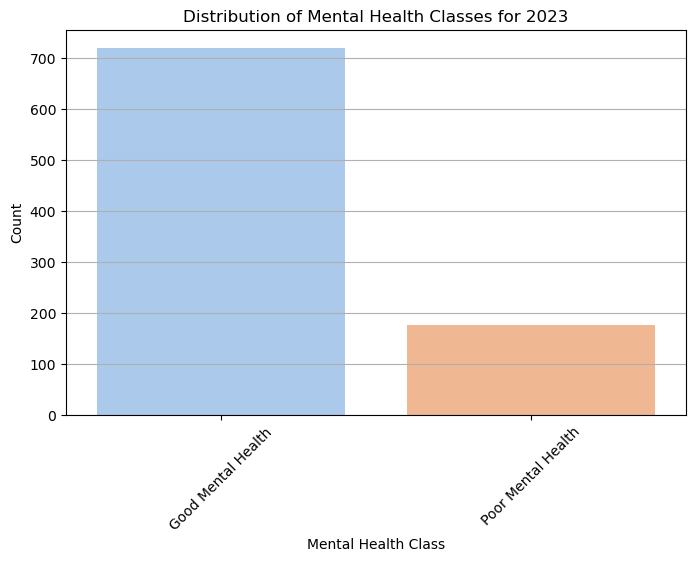

The updated 2023 dataset with the 'standardized_score', 'mental_health_class', and 'class' columns has been saved to: C:/Users/u1246538/Downloads/liss-data/mhi5_scores_2023.csv


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned 2023 dataset
file_path_2023 = 'C:/Users/u1246538/Downloads/liss-data/merged_df_2023_cleaned.csv'
df_2023 = pd.read_csv(file_path_2023)

# Select the MHI-5 columns with the correct names for 2023
mhi5_columns_2023 = ['ch23p011', 'ch23p012', 'ch23p013', 'ch23p014', 'ch23p015']
df_mhi5_2023 = df_2023[mhi5_columns_2023]

# Debug: Check for missing values in the selected columns
print("\nMissing values in MHI-5 columns:")
print(df_mhi5_2023.isnull().sum())

# Convert columns to numeric, forcing errors to NaN
df_mhi5_2023[mhi5_columns_2023] = df_mhi5_2023[mhi5_columns_2023].apply(pd.to_numeric, errors='coerce')

# Check if the conversion worked
print("\nData types after conversion:")
print(df_mhi5_2023.dtypes)

# Reverse scoring for negative questions (ch23p011, ch23p012, ch23p014)
reverse_columns_2023 = ['ch23p011', 'ch23p012', 'ch23p014']
df_mhi5_2023[reverse_columns_2023] = 7 - df_mhi5_2023[reverse_columns_2023]

# Sum the scores for each individual (raw score ranges between 5 and 30)
df_mhi5_2023['raw_score'] = df_mhi5_2023.sum(axis=1)

# Standardize the score to a 0-100 scale
df_mhi5_2023['standardized_score'] = ((df_mhi5_2023['raw_score'] - 5) / 25) * 100

# Create a binary classification for mental health status
df_mhi5_2023['mental_health_class'] = df_mhi5_2023['standardized_score'].apply(
    lambda x: 'Good Mental Health' if x > 60 else 'Poor Mental Health'
)

# Create numeric classes for modeling (0 for good, 1 for poor) and rename the column to 'class'
df_mhi5_2023['class'] = df_mhi5_2023['mental_health_class'].apply(
    lambda x: 0 if x == 'Good Mental Health' else 1
)

# Calculate the count and proportion of each class
class_counts_2023 = df_mhi5_2023['mental_health_class'].value_counts()
class_proportions_2023 = class_counts_2023 / class_counts_2023.sum() * 100  # Percentage

# Output the counts and proportions
print("\nCounts of Mental Health Classes for 2023:")
print(class_counts_2023)
print("\nProportions of Mental Health Classes for 2023 (%):")
print(class_proportions_2023)

# Show counts for the new class column
class_count_values_2023 = df_mhi5_2023['class'].value_counts().rename({0: 'Good Mental Health (0)', 1: 'Poor Mental Health (1)'})
print("\nCounts of Class for 2023:")
print(class_count_values_2023)

# Merge the new columns back into the original dataframe
df_2023[['standardized_score', 'mental_health_class', 'class']] = df_mhi5_2023[['standardized_score', 'mental_health_class', 'class']]

# Save the modified DataFrame to the original file path (or a new one)
output_file_path = 'C:/Users/u1246538/Downloads/liss-data/merged_df_2023_cleaned.csv'
df_2023.to_csv(output_file_path, index=False)

# Check the first few rows to verify the new columns
print(df_2022[['standardized_score', 'mental_health_class', 'class']].head())





# Visualization: Bar plot of the counts
plt.figure(figsize=(8, 5))
sns.countplot(data=df_mhi5_2023, x='mental_health_class', palette='pastel')
plt.title('Distribution of Mental Health Classes for 2023')
plt.xlabel('Mental Health Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Save the figure
plt.savefig('mental_health_distribution_2023.png', dpi=300, bbox_inches='tight')  # Save as PNG file

# Show the plot
plt.show()

print("The updated 2023 dataset with the 'standardized_score', 'mental_health_class', and 'class' columns has been saved to:", output_file_path_2023)


In [55]:
import pandas as pd

# Load the cleaned 2023 dataset
file_path_2023 = 'C:/Users/u1246538/Downloads/liss-data/merged_df_2023_cleaned.csv'
df_2023 = pd.read_csv(file_path_2023)

# Print all column names
print("All columns in the merged_df_2023_cleaned.csv dataset:")
print(df_2023.columns.tolist())


All columns in the merged_df_2023_cleaned.csv dataset:
['ch23p011', 'ch23p012', 'ch23p013', 'ch23p014', 'ch23p015', 'nomem_encr', 'ch22o162', 'cp22n020', 'cp22n021', 'cp22n022', 'cp22n023', 'cp22n024', 'cp22n025', 'cp22n026', 'cp22n027', 'cp22n028', 'cp22n029', 'cp22n030', 'cp22n031', 'cp22n032', 'cp22n033', 'cp22n034', 'cp22n035', 'cp22n036', 'cp22n037', 'cp22n038', 'cp22n039', 'cp22n040', 'cp22n041', 'cp22n042', 'cp22n043', 'cp22n044', 'cp22n045', 'cp22n046', 'cp22n047', 'cp22n048', 'cp22n049', 'cp22n050', 'cp22n051', 'cp22n052', 'cp22n053', 'cp22n054', 'cp22n055', 'cp22n056', 'cp22n057', 'cp22n058', 'cp22n059', 'cp22n060', 'cp22n061', 'cp22n062', 'cp22n063', 'cp22n064', 'cp22n065', 'cp22n066', 'cp22n067', 'cp22n068', 'cp22n069', 'cp22n070', 'cp22n071', 'cp22n072', 'cp22n073', 'cp22n074', 'cp22n075', 'cp22n076', 'cp22n077', 'cp22n078', 'cp22n079', 'cp22n099', 'cp22n100', 'cp22n101', 'cp22n102', 'cp22n103', 'cp22n104', 'cp22n105', 'cp22n106', 'cp22n107', 'cp22n108', 'cp22n109', 'cp22n

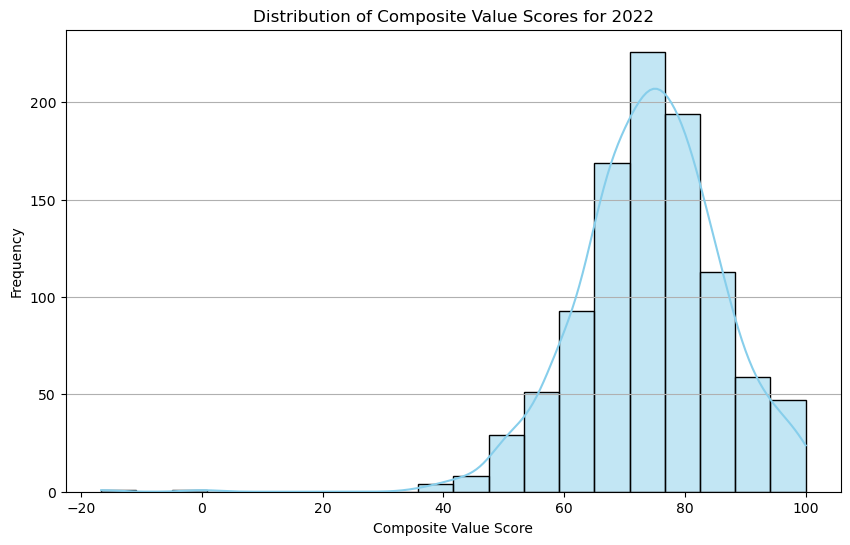

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the cleaned 2022 dataset for composite score calculations
composite_file_path = 'C:/Users/u1246538/Downloads/liss-data/merged_health_data_2022_cleaned.csv'
df_2022 = pd.read_csv(composite_file_path)

# Select the instrumental and terminal columns (adjust column names as necessary)
instrumental_values = ['cp22n099', 'cp22n100', 'cp22n101', 'cp22n102', 'cp22n103', 
                       'cp22n104', 'cp22n105', 'cp22n106', 'cp22n107', 'cp22n108', 
                       'cp22n109', 'cp22n110', 'cp22n111', 'cp22n112', 'cp22n113', 
                       'cp22n114', 'cp22n115', 'cp22n116']

terminal_values = ['cp22n117', 'cp22n118', 'cp22n119', 'cp22n120', 'cp22n121', 
                   'cp22n122', 'cp22n123', 'cp22n124', 'cp22n125', 'cp22n126', 
                   'cp22n127', 'cp22n128', 'cp22n129', 'cp22n130', 'cp22n131', 
                   'cp22n132', 'cp22n133', 'cp22n134']

# Convert instrumental and terminal columns to numeric, coercing errors to NaN
df_2022[instrumental_values] = df_2022[instrumental_values].apply(pd.to_numeric, errors='coerce')
df_2022[terminal_values] = df_2022[terminal_values].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0 before summation
df_2022[instrumental_values] = df_2022[instrumental_values].fillna(0)
df_2022[terminal_values] = df_2022[terminal_values].fillna(0)

# Calculate the sum of instrumental and terminal scores
df_2022['instrumental_sum'] = df_2022[instrumental_values].sum(axis=1)
df_2022['terminal_sum'] = df_2022[terminal_values].sum(axis=1)

# Calculate the composite value score
df_2022['values_total'] = df_2022['instrumental_sum'] + df_2022['terminal_sum']

# Normalize the composite score to a 0-100 scale (assuming min: 36, max: 252)
df_2022['values_composite'] = ((df_2022['values_total'] - 36) / (252 - 36)) * 100


# Visualization: Histogram of Composite Value Scores
plt.figure(figsize=(10, 6))
sns.histplot(df_2022['values_composite'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Composite Value Scores for 2022')
plt.xlabel('Composite Value Score')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Save the figure
plt.savefig('C:/Users/u1246538/Downloads/liss-data/composite_value_score_distribution_2022.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()





In [106]:
import pandas as pd
# Making the diffrence_score of MHI5
# Load the cleaned datasets for 2022 and 2023
file_path_2022 = 'C:/Users/u1246538/Downloads/liss-data/merged_health_data_2022_cleaned_with_mhi5.csv'  # Path to the 2022 dataset

file_path_2023 = 'C:/Users/u1246538/Downloads/liss-data/merged_df_2023_cleaned.csv' # Path to the 2023 dataset

df_2022 = pd.read_csv(file_path_2022)
df_2023 = pd.read_csv(file_path_2023)

# Print columns to verify they are correctly loaded
print("Columns in 2022 DataFrame:")
print(df_2022.columns.tolist())

print("\nColumns in 2023 DataFrame:")
print(df_2023.columns.tolist())

# Merge the two datasets on 'nomem_encr' (the unique respondent identifier)
df_merged = pd.merge(df_2022[['nomem_encr', 'standardized_score', 'mental_health_class', 'class']], 
                     df_2023[['nomem_encr', 'standardized_score', 'mental_health_class', 'class']], 
                     on='nomem_encr', 
                     how='inner')  # Use 'inner' join to merge only matching rows

# Calculate the difference between MHI5 scores (standardized_score)
df_merged['difference_mhi5'] = df_merged['standardized_score_y'] - df_merged['standardized_score_x']

# Optional: Categorize the difference into classes (e.g., 1 for improvement, -1 for decline, 0 for no significant change)
neutral_threshold = 5  # adjust this threshold based on data. look at distribution of diffrence_MHi5 what does it show? should trehold be bigger then 5? 
df_merged['change_class'] = df_merged['difference_mhi5'].apply(
    lambda x: 1 if x > neutral_threshold else (-1 if x < -neutral_threshold else 0)
)

# Save the result to a new CSV file
output_file_path = 'C:/Users/u1246538/Downloads/liss-data/data_difference_mhi5.csv'
df_merged.to_csv(output_file_path, index=False)

# Sample data output
print("\nSample Data with Difference MHI5 and Change Class:")
print(df_merged[['nomem_encr', 'standardized_score_x', 'standardized_score_y', 'difference_mhi5', 'change_class']].head())



Columns in 2022 DataFrame:
['ch22o011', 'ch22o012', 'ch22o013', 'ch22o014', 'ch22o015', 'ch22o162', 'nomem_encr', 'cp22n020', 'cp22n021', 'cp22n022', 'cp22n023', 'cp22n024', 'cp22n025', 'cp22n026', 'cp22n027', 'cp22n028', 'cp22n029', 'cp22n030', 'cp22n031', 'cp22n032', 'cp22n033', 'cp22n034', 'cp22n035', 'cp22n036', 'cp22n037', 'cp22n038', 'cp22n039', 'cp22n040', 'cp22n041', 'cp22n042', 'cp22n043', 'cp22n044', 'cp22n045', 'cp22n046', 'cp22n047', 'cp22n048', 'cp22n049', 'cp22n050', 'cp22n051', 'cp22n052', 'cp22n053', 'cp22n054', 'cp22n055', 'cp22n056', 'cp22n057', 'cp22n058', 'cp22n059', 'cp22n060', 'cp22n061', 'cp22n062', 'cp22n063', 'cp22n064', 'cp22n065', 'cp22n066', 'cp22n067', 'cp22n068', 'cp22n069', 'cp22n070', 'cp22n071', 'cp22n072', 'cp22n073', 'cp22n074', 'cp22n075', 'cp22n076', 'cp22n077', 'cp22n078', 'cp22n079', 'cp22n099', 'cp22n100', 'cp22n101', 'cp22n102', 'cp22n103', 'cp22n104', 'cp22n105', 'cp22n106', 'cp22n107', 'cp22n108', 'cp22n109', 'cp22n110', 'cp22n111', 'cp22n112'

In [108]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/u1246538/Downloads/liss-data/data_difference_mhi5.csv'
df = pd.read_csv(file_path)

# Print the shape of the DataFrame (rows, columns)
print("Shape of the DataFrame:", df.shape)

# Print all column names
print("\nColumns in the DataFrame:")
print(df.columns.tolist())


Shape of the DataFrame: (895, 9)

Columns in the DataFrame:
['nomem_encr', 'standardized_score_x', 'mental_health_class_x', 'class_x', 'standardized_score_y', 'mental_health_class_y', 'class_y', 'difference_mhi5', 'change_class']


In [110]:
import pandas as pd
#merging the MHI5 difference score column and the change_class column with the  Merged dataset of 2022
# Load the datasets
file_path_merged_data = 'C:/Users/u1246538/Downloads/liss-data/data_difference_mhi5.csv'
file_path_2022_data = 'C:/Users/u1246538/Downloads/liss-data/merged_health_data_2022_cleaned.csv'

df_diff_mhi5 = pd.read_csv(file_path_merged_data)
df_2022 = pd.read_csv(file_path_2022_data)

# Merge the datasets on 'nomem_encr' column
df_merged = pd.merge(df_2022, df_diff_mhi5[['nomem_encr', 'difference_mhi5', 'change_class']], on='nomem_encr', how='left')

# Check the shape of the merged dataframe
print("Shape of the merged DataFrame:", df_merged.shape)

# Print the column names of the merged DataFrame
print("\nColumns in the merged DataFrame:")
print(df_merged.columns.tolist())

# Optionally, save the merged DataFrame to a new CSV file
output_file_path = 'C:/Users/u1246538/Downloads/liss-data/merged_health_data_2022_cleaned_with_difference_mhi5.csv'
df_merged.to_csv(output_file_path, index=False)


Shape of the merged DataFrame: (995, 138)

Columns in the merged DataFrame:
['ch22o011', 'ch22o012', 'ch22o013', 'ch22o014', 'ch22o015', 'ch22o162', 'nomem_encr', 'cp22n020', 'cp22n021', 'cp22n022', 'cp22n023', 'cp22n024', 'cp22n025', 'cp22n026', 'cp22n027', 'cp22n028', 'cp22n029', 'cp22n030', 'cp22n031', 'cp22n032', 'cp22n033', 'cp22n034', 'cp22n035', 'cp22n036', 'cp22n037', 'cp22n038', 'cp22n039', 'cp22n040', 'cp22n041', 'cp22n042', 'cp22n043', 'cp22n044', 'cp22n045', 'cp22n046', 'cp22n047', 'cp22n048', 'cp22n049', 'cp22n050', 'cp22n051', 'cp22n052', 'cp22n053', 'cp22n054', 'cp22n055', 'cp22n056', 'cp22n057', 'cp22n058', 'cp22n059', 'cp22n060', 'cp22n061', 'cp22n062', 'cp22n063', 'cp22n064', 'cp22n065', 'cp22n066', 'cp22n067', 'cp22n068', 'cp22n069', 'cp22n070', 'cp22n071', 'cp22n072', 'cp22n073', 'cp22n074', 'cp22n075', 'cp22n076', 'cp22n077', 'cp22n078', 'cp22n079', 'cp22n099', 'cp22n100', 'cp22n101', 'cp22n102', 'cp22n103', 'cp22n104', 'cp22n105', 'cp22n106', 'cp22n107', 'cp22n108

C:\Users\u1246538\AppData\Local\Temp\ipykernel_17048\1032706848.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='change_class', palette='Set2')


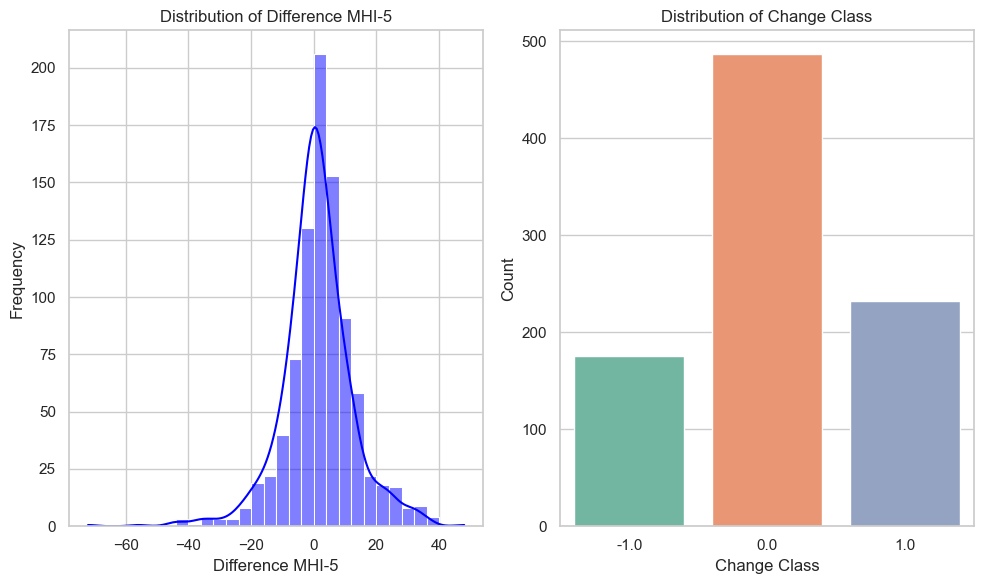

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/u1246538/Downloads/liss-data/merged_health_data_2022_cleaned_with_difference_mhi5.csv'
df = pd.read_csv(file_path)

# Set the visual style
sns.set(style="whitegrid")

# Plot the difference_mhi5 column (histogram with KDE)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Plot on the left side
sns.histplot(df['difference_mhi5'], bins=30, kde=True, color='blue')
plt.title('Distribution of Difference MHI-5')
plt.xlabel('Difference MHI-5')
plt.ylabel('Frequency')

# Plot the change_class column (count plot for categorical data)
plt.subplot(1, 2, 2)  # Plot on the right side
sns.countplot(data=df, x='change_class', palette='Set2')
plt.title('Distribution of Change Class')
plt.xlabel('Change Class')
plt.ylabel('Count')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


In [114]:
import pandas as pd
# if you look atthe results you see the values are between -100 adn 100. so there is actually no outliers. cause the max and the min change is -100 and 100
# Load the cleaned datasets for 2022 and 2023
file_path_2022 = 'C:/Users/u1246538/Downloads/liss-data/merged_health_data_2022_cleaned_with_difference_mhi5.csv'
df_2022 = pd.read_csv(file_path_2022)

# Calculate the Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_2022['difference_mhi5'].quantile(0.25)
Q3 = df_2022['difference_mhi5'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_2022[(df_2022['difference_mhi5'] < lower_bound) | (df_2022['difference_mhi5'] > upper_bound)]

# Number of outliers
num_outliers = outliers.shape[0]

# Output the results
print(f"Number of outliers in the difference score: {num_outliers}")
print("\nOutlier Values:")
print(outliers[['difference_mhi5']])


Number of outliers in the difference score: 46

Outlier Values:
     difference_mhi5
1               28.0
20              32.0
35             -24.0
38              48.0
47             -28.0
135            -44.0
147            -32.0
222             28.0
229            -40.0
242            -44.0
268             32.0
290            -56.0
304            -28.0
315             32.0
330             28.0
351             36.0
361            -72.0
374             28.0
387            -24.0
391            -44.0
396            -36.0
411            -24.0
426            -24.0
429             36.0
443            -36.0
507            -32.0
522            -32.0
542             32.0
552            -24.0
601             32.0
605             28.0
612             28.0
625             28.0
685             36.0
705            -36.0
717             28.0
726            -36.0
743             32.0
755             36.0
780             32.0
782            -28.0
786            -24.0
812            -24.0
840         

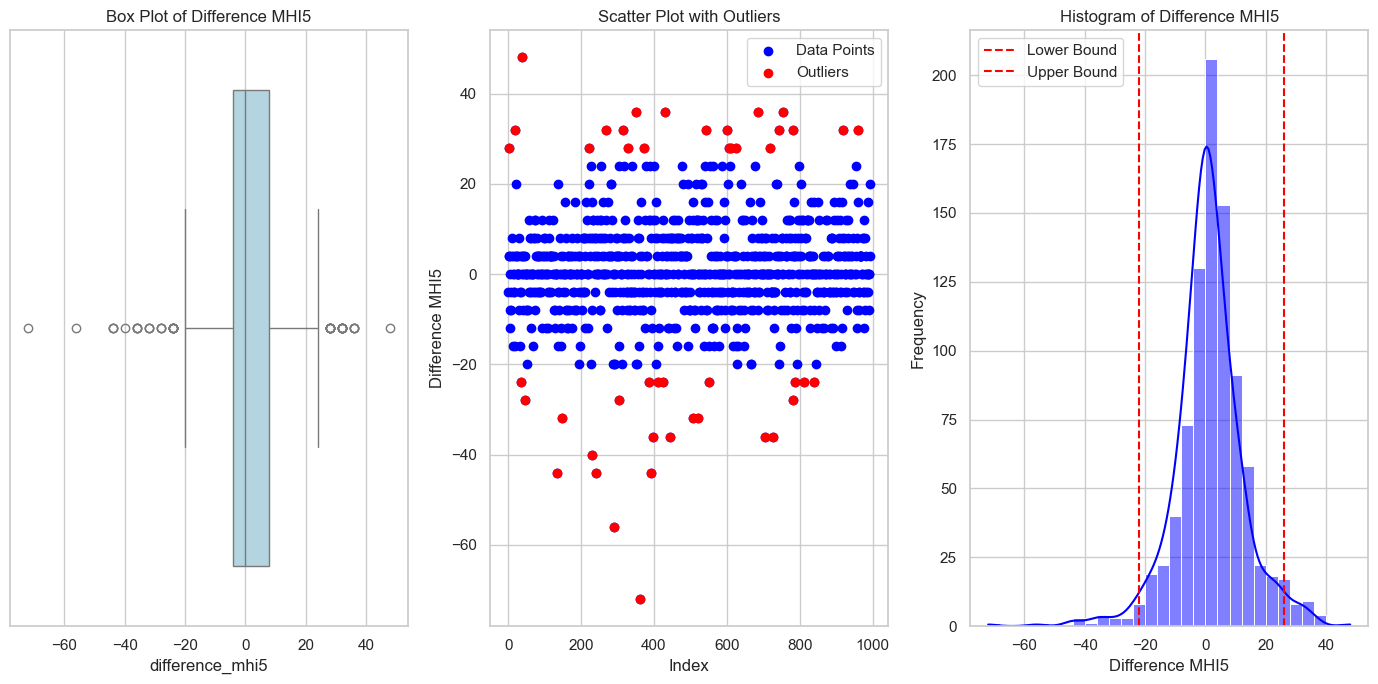

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path_2022 = 'C:/Users/u1246538/Downloads/liss-data/merged_health_data_2022_cleaned_with_difference_mhi5.csv'
df_2022 = pd.read_csv(file_path_2022)

# Calculate the Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_2022['difference_mhi5'].quantile(0.25)
Q3 = df_2022['difference_mhi5'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_2022[(df_2022['difference_mhi5'] < lower_bound) | (df_2022['difference_mhi5'] > upper_bound)]

# Plotting
plt.figure(figsize=(14, 7))

# Box plot to show outliers
plt.subplot(1, 3, 1)
sns.boxplot(data=df_2022, x='difference_mhi5', color='lightblue')
plt.title('Box Plot of Difference MHI5')

# Scatter plot to visualize outliers
plt.subplot(1, 3, 2)
plt.scatter(df_2022.index, df_2022['difference_mhi5'], color='blue', label='Data Points')
plt.scatter(outliers.index, outliers['difference_mhi5'], color='red', label='Outliers', zorder=5)
plt.title('Scatter Plot with Outliers')
plt.xlabel('Index')
plt.ylabel('Difference MHI5')
plt.legend()

# Histogram to show distribution of the difference_mhi5 and highlight outliers
plt.subplot(1, 3, 3)
sns.histplot(df_2022['difference_mhi5'], bins=30, kde=True, color='blue')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title('Histogram of Difference MHI5')
plt.xlabel('Difference MHI5')
plt.ylabel('Frequency')
plt.legend()

# Layout adjustment
plt.tight_layout()

# Show the plots
plt.show()


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# merging dataset 2022 with difference score and saved. and plots
# Load the original cleaned 2022 dataset
file_path_2022 = 'C:/Users/u1246538/Downloads/liss-data/merged_health_data_2022_cleaned.csv'
df_2022 = pd.read_csv(file_path_2022)

# Load the MHI-5 scores datasets for 2022 and 2023
mhi5_scores_2022 = pd.read_csv('C:/Users/u1246538/Downloads/liss-data/mhi5_scores_2022.csv')
mhi5_scores_2023 = pd.read_csv('C:/Users/u1246538/Downloads/liss-data/mhi5_scores_2023.csv')

# Check the columns in both datasets
print("Columns in 2022 dataset:", df_2022.columns)
print("Columns in MHI-5 Scores 2022:", mhi5_scores_2022.columns)
print("Columns in MHI-5 Scores 2023:", mhi5_scores_2023.columns)

# Add standardized scores to the 2022 dataset
df_2022['standardized_score_2022'] = mhi5_scores_2022['standardized_score'].values
df_2022['standardized_score_2023'] = mhi5_scores_2023['standardized_score'].values

# Calculate the difference score (2023 score - 2022 score)
df_2022['difference_score'] = df_2022['standardized_score_2023'] - df_2022['standardized_score_2022']

# Define three classes for the difference score
def categorize_difference(score):
    if score < -25:
        return 'Decrease'
    elif score > 25:
        return 'Increase'
    else:
        return 'Stable'

# Apply the function to create a new column for the three classes
df_2022['difference_class'] = df_2022['difference_score'].apply(categorize_difference)

# Save the updated DataFrame with difference score and three classes to a new CSV file
output_file_path = 'C:/Users/u1246538/Downloads/liss-data/merged_2022_difference_score_with_classes.csv'
df_2022.to_csv(output_file_path, index=False)

# Print the shape of the difference dataset
print("Shape of the dataset with difference score and classes:", df_2022.shape)

# Output a sample of the data to verify the results
print("\nSample Data with Difference Score, Classes, and Predictors:")
print(df_2022[['standardized_score_2022', 'standardized_score_2023', 'difference_score', 'difference_class']].head())

# Plot histogram of the difference score
plt.figure(figsize=(10, 6))
sns.histplot(df_2022['difference_score'], bins=20, kde=True)
plt.title('Histogram of Difference Score')
plt.xlabel('Difference Score')
plt.ylabel('Frequency')
# Save the histogram figure
plt.savefig('C:/Users/u1246538/Downloads/liss-data/difference_score_histogram.png')
plt.show()

# Plot boxplot of the difference score by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='difference_class', y='difference_score', data=df_2022)
plt.title('Boxplot of Difference Score by Class')
plt.xlabel('Difference Class')
plt.ylabel('Difference Score')
# Save the boxplot figure
plt.savefig('C:/Users/u1246538/Downloads/liss-data/difference_score_boxplot.png')
plt.show()


Columns in 2022 dataset: Index(['ch22o011', 'ch22o012', 'ch22o013', 'ch22o014', 'ch22o015', 'ch22o162',
       'nomem_encr', 'cp22n020', 'cp22n021', 'cp22n022',
       ...
       'burgstat', 'woonvorm', 'herkomstgroep', 'oplcat', 'brutohh_f',
       'nettohh_f', 'brutoink', 'brutoink_f', 'nettoink', 'nettoink_f'],
      dtype='object', length=136)
Columns in MHI-5 Scores 2022: Index(['ch22o011', 'ch22o012', 'ch22o013', 'ch22o014', 'ch22o015', 'raw_score',
       'standardized_score', 'mental_health_class', 'class'],
      dtype='object')
Columns in MHI-5 Scores 2023: Index(['ch23p011', 'ch23p012', 'ch23p013', 'ch23p014', 'ch23p015', 'raw_score',
       'standardized_score', 'mental_health_class', 'class'],
      dtype='object')


ValueError: Length of values (994) does not match length of index (995)